##**Basic EDA**##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(8,8)

In [2]:
def visualize1(df):
  print("Distribution of reviews")
  print(df.rating.value_counts(normalize=True)*100)
  sns.countplot(df.rating)

def visualize2(df):
  df["Month"]=df.date.dt.month 
  frame=df.groupby("Month").agg("count")["rating"]
  print("No of reviews by months")
  frame.plot.bar()

In [3]:
amazon=pd.read_excel("/content/drive/MyDrive/TXTA Assignment Agniva Roy/datasets/amazon_Apple_IPhone_13_20220921.xlsx")
flipkart=pd.read_excel("/content/drive/MyDrive/TXTA Assignment Agniva Roy/datasets/flipkart_Apple_IPhone_13_20220921.xlsx")

Distribution of reviews
5    77.796610
4    17.627119
3     4.406780
2     0.169492
Name: rating, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


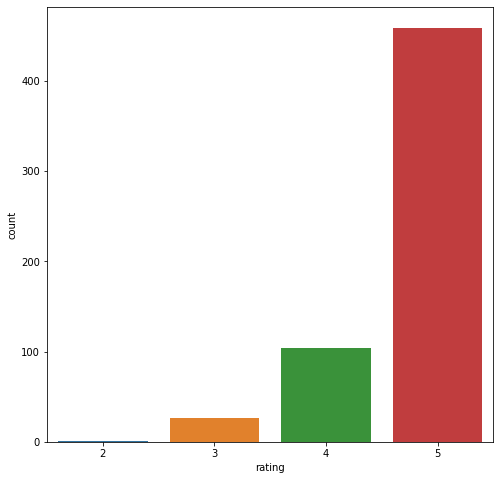

In [4]:
visualize1(amazon) 

No of reviews by months


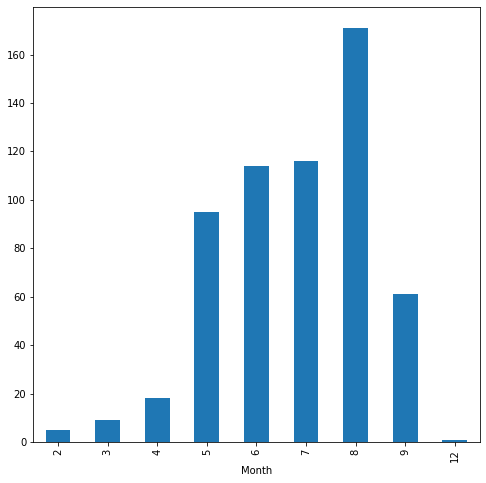

In [5]:
visualize2(amazon) 

In [6]:
flipkart.head()

,Date,rating,review
0,2022-07-23,5,Brilliant I switch to ios from android after 1...
1,2021-10-26,5,"Fabulous! Amazing beast....As expected , didn'..."
2,2022-07-23,5,Worth every penny Day 2 Review: Display shows ...
3,2022-01-24,5,Perfect product! Awesome camera Amazing batter...
4,2021-11-25,5,Must buy! Just upgraded from 11 to iPhone 13 ....


In [7]:
flipkart.columns=["date","rating","review"]

Distribution of reviews
5    83.985765
4    11.565836
1     2.135231
3     1.779359
2     0.533808
Name: rating, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


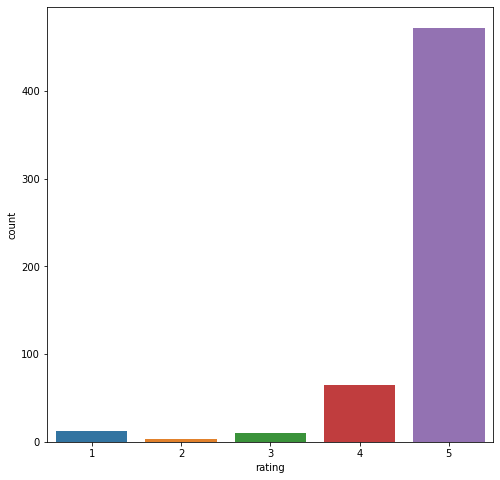

In [8]:
visualize1(flipkart)

No of reviews by months


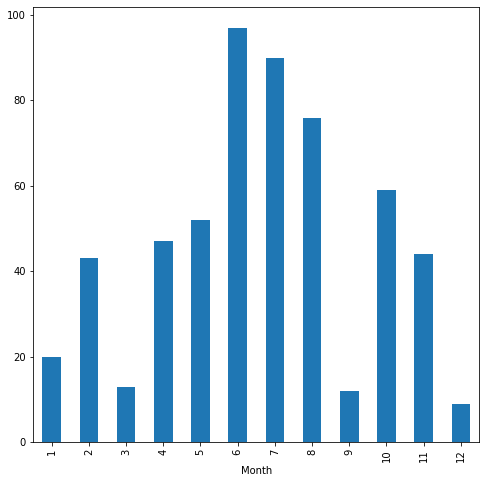

In [9]:
visualize2(flipkart)

In [10]:
amazon.rating.mean()

4.730508474576271

In [11]:
flipkart.rating.mean()

4.747330960854092

##**WordCloud and CountVectorizer**##

In [12]:
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [13]:
amazon=amazon[["date","rating","review"]]

In [14]:
amazon=amazon.dropna()

In [15]:
s=list(STOPWORDS)+ ["Flipkart","iPhone","phone","Apple","Amazon"]

In [16]:
def wordcloud(df):
  only_reviews=" ".join(df["review"])
  wc=WordCloud(width=1200,height=800,max_words=200,stopwords=s,background_color="white")
  plt.figure(figsize=(12,8))
  plt.imshow(wc.generate_from_text(only_reviews))
  plt.show()

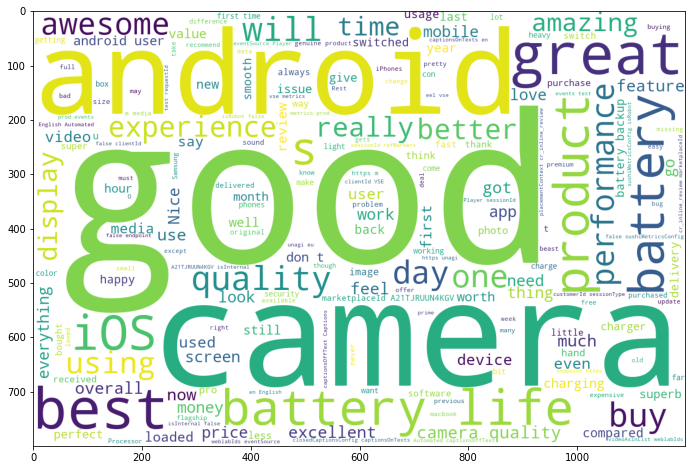

In [18]:
#wordcloud for amazon
wordcloud(amazon)

Prominent words - good,camera,battery life,great,android,product,great

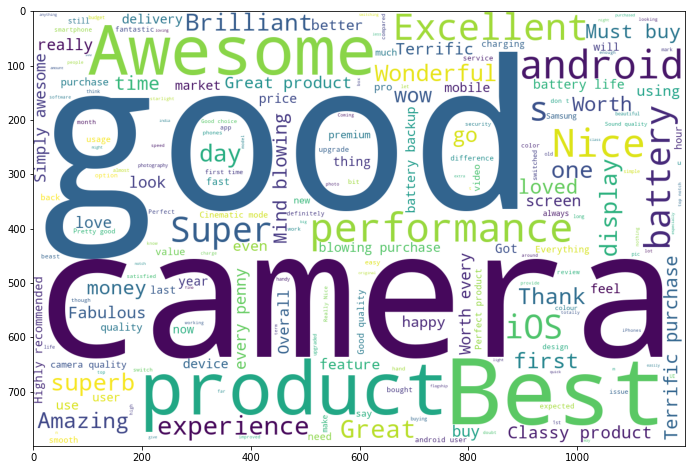

In [19]:
#wordcloud for flipkart
wordcloud(flipkart)

Prominent words-Best,good,camera,awesome,product,battery,superb

In [20]:
def wordcounts(df,i):
  tf=CountVectorizer(token_pattern="[a-z']+",max_df=0.6,min_df=10,stop_words=s,ngram_range=(i,i))
  tf_mat=tf.fit_transform(df.review)
  word_freq=tf_mat.sum(axis=0)
  wf=np.array(word_freq)[0]
  vocab=dict()
  vocab_reversed={v:k for k,v in tf.vocabulary_.items()}
  for i in vocab_reversed.keys():
    vocab[vocab_reversed[i]]=wf[i]
  word_dict=dict(sorted(vocab.items(),key=lambda x:x[1],reverse=True))
  print(word_dict)

In [21]:
wordcounts(amazon,1)

{'iphone': 265, 'good': 223, 'camera': 183, 'battery': 175, 'android': 134, 'quality': 117, 'apple': 92, 'amazon': 87, 'great': 86, 'life': 84, 'best': 83, 's': 80, 'ios': 76, 'product': 71, 'one': 62, 'will': 61, 'buy': 60, 't': 58, 'time': 57, 'performance': 54, 'awesome': 52, 'display': 50, 'using': 50, 'really': 47, 'experience': 47, 'better': 47, 'day': 45, 'user': 44, 'amazing': 42, 'first': 40, 'got': 39, 'excellent': 39, 'screen': 39, 'overall': 37, 'now': 36, 'much': 36, 'use': 36, 'media': 35, 'nice': 34, 'love': 33, 'price': 32, 'review': 31, 'everything': 31, 'go': 30, 'money': 30, 'even': 29, 'need': 28, 'used': 28, 'features': 28, 'm': 28, 'reviews': 28, 'charging': 27, 'worth': 27, 'u': 26, 'mobile': 26, 'true': 25, 'say': 25, 'loaded': 25, 'smooth': 24, 'years': 24, 'well': 24, 'little': 23, 'still': 23, 'value': 23, 'don': 23, 'back': 23, 'backup': 23, 'feel': 22, 'phones': 22, 'new': 22, 'looks': 22, 'compared': 22, 'bit': 21, 'perfect': 21, 'hours': 21, 'superb': 21,

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'flipkart', 'iphone'] not in stop_words.
  % sorted(inconsistent)


In [22]:
wordcounts(amazon,2)

{'battery life': 78, 'camera quality': 41, 'media loaded': 24, 'don t': 23, 'android user': 21, 'android ios': 20, 'battery backup': 20, 'value money': 15, 'first time': 14, 'good battery': 14, 'genuine product': 11, 'first iphone': 11, 'good camera': 11, 'switched android': 10, 'camera good': 10, 'camera battery': 10}


In [23]:
wordcounts(flipkart,1)

{'good': 209, 'iphone': 180, 'product': 157, 'camera': 131, 'awesome': 114, 'battery': 109, 'best': 99, 'android': 87, 'nice': 83, 'performance': 79, 'great': 78, 'purchase': 76, 'excellent': 66, 'super': 65, 's': 64, 'quality': 64, 'worth': 64, 'buy': 62, 'apple': 61, 'terrific': 61, 'flipkart': 58, 'ios': 54, 'experience': 52, 'first': 50, 'display': 46, 'one': 45, 'brilliant': 42, 'time': 42, 'superb': 42, 'every': 41, 'wonderful': 41, 'amazing': 39, 'go': 38, 'really': 37, 'wow': 37, 'must': 37, 'loved': 36, 'money': 35, 'better': 34, 'mind': 34, 'classy': 34, 'life': 33, 'blowing': 32, 'fabulous': 30, 'simply': 30, 'user': 29, 'screen': 28, 't': 28, 'penny': 28, 'love': 28, 'overall': 27, 'using': 26, 'even': 26, 'happy': 26, 'market': 25, 'perfect': 25, 'thanks': 25, 'delivery': 25, 'now': 25, 'price': 24, 'use': 24, 'backup': 24, 'days': 23, 'day': 23, 'fast': 23, 'mobile': 23, 'highly': 22, 'got': 22, 'mode': 21, 'recommended': 21, 'will': 19, 'premium': 18, 'usage': 18, 'devic

In [24]:
wordcounts(flipkart,2)

{'must buy': 35, 'terrific purchase': 32, 'mind blowing': 32, 'classy product': 31, 'great product': 30, 'worth every': 28, 'every penny': 28, 'simply awesome': 28, 'blowing purchase': 26, 'battery life': 25, 'battery backup': 23, 'best market': 21, 'highly recommended': 20, 'first iphone': 19, 'camera quality': 16, 'android ios': 16, 'perfect product': 15, 'good quality': 15, 'cinematic mode': 14, 'thanks flipkart': 14, 'value money': 14, 'good battery': 13, 'android user': 12, 'nice product': 12, 'awesome camera': 11, 'pretty good': 11, 'first time': 11, 'camera performance': 10, 'really nice': 10}


##**LSA**##

In [25]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 

In [26]:
from numpy.lib.twodim_base import tri
def LSA(df):
  reviews=df.review
  vectorizer=TfidfVectorizer(stop_words=s,use_idf=True,ngram_range=(1,4))
  X=vectorizer.fit_transform(reviews)
  print("TFIDF Matrix")
  print(X)
  print("*"*500)
  lsa=TruncatedSVD(n_components=5,n_iter=100)
  lsa.fit(X)
  terms=vectorizer.get_feature_names()
  for i,comp in enumerate(lsa.components_):
    termsInComp=zip(terms,comp)
    sortedTerms=sorted(termsInComp,key=lambda x:x[1],reverse=True)[:10]
    for term in sortedTerms:
      print(term[0])
    print("*"*500)


In [27]:
LSA(flipkart)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


TFIDF Matrix
  (0, 12545)	0.03010975306741039
  (0, 4284)	0.03010975306741039
  (0, 7401)	0.03010975306741039
  (0, 14498)	0.03010975306741039
  (0, 8837)	0.03010975306741039
  (0, 13063)	0.03010975306741039
  (0, 6791)	0.03010975306741039
  (0, 7230)	0.03010975306741039
  (0, 1780)	0.03010975306741039
  (0, 8385)	0.03010975306741039
  (0, 15522)	0.03010975306741039
  (0, 3266)	0.03010975306741039
  (0, 13295)	0.03010975306741039
  (0, 10600)	0.03010975306741039
  (0, 3206)	0.03010975306741039
  (0, 3223)	0.03010975306741039
  (0, 450)	0.03010975306741039
  (0, 14898)	0.03010975306741039
  (0, 3924)	0.03010975306741039
  (0, 496)	0.03010975306741039
  (0, 485)	0.03010975306741039
  (0, 1246)	0.03010975306741039
  (0, 8241)	0.03010975306741039
  (0, 3195)	0.03010975306741039
  (0, 715)	0.03010975306741039
  :	:
  (560, 1692)	0.15532479178827452
  (560, 9389)	0.10545090129339026
  (560, 2297)	0.10545090129339026
  (560, 1528)	0.12454039706104168
  (560, 6360)	0.14473475655755477
  (560, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


nice
awesome
good
terrific
purchase
terrific purchase
product
super
awesome good
excellent
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
purchase
terrific
terrific purchase
purchase good
terrific purchase good
blowing purchase
mind blowing purchase
blowing
mind blowing
mind
******************************************************************************************************************************************************************************************************************************************************************************

In [28]:
LSA(amazon) 

TFIDF Matrix
  (0, 4581)	0.026648133465137076
  (0, 18732)	0.026648133465137076
  (0, 19173)	0.026648133465137076
  (0, 1917)	0.026648133465137076
  (0, 16367)	0.026648133465137076
  (0, 25666)	0.026648133465137076
  (0, 15421)	0.026648133465137076
  (0, 24738)	0.026648133465137076
  (0, 12389)	0.026648133465137076
  (0, 22415)	0.026648133465137076
  (0, 21450)	0.026648133465137076
  (0, 7561)	0.026648133465137076
  (0, 23237)	0.026648133465137076
  (0, 16504)	0.026648133465137076
  (0, 14808)	0.026648133465137076
  (0, 22912)	0.026648133465137076
  (0, 18986)	0.026648133465137076
  (0, 15412)	0.026648133465137076
  (0, 2467)	0.026648133465137076
  (0, 25371)	0.026648133465137076
  (0, 19179)	0.026648133465137076
  (0, 1919)	0.026648133465137076
  (0, 26691)	0.026648133465137076
  (0, 25672)	0.026648133465137076
  (0, 3398)	0.026648133465137076
  :	:
  (540, 13976)	0.08928064430650905
  (540, 23715)	0.08928064430650905
  (540, 17907)	0.08192510199878397
  (540, 15803)	0.058750288313265

##**LDA**##

In [ ]:
!pip install ktrain

In [30]:
import ktrain 

In [31]:
def LDA(df):
  reviews=df.review
  tm=ktrain.text.get_topic_model(reviews,n_features=10000,n_topics=7)
  print("Printing Topics")
  tm.print_topics()
  print("*"*500)
  tm.build(reviews,threshold=0.1)
  print("Printing topics with counts")
  tm.print_topics(show_counts=True)
  print("*"*500)
  print("Vizualization")
  tm.visualize_documents(doc_topics=tm.get_doctopics())

In [32]:
LDA(flipkart)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
LDA(amazon) 

Output hidden; open in https://colab.research.google.com to view.

##**Word2Vec**##

In [ ]:
!pip install gensim 
!pip install python-Levenstein

In [40]:
import gensim 
from sklearn.decomposition import PCA

In [41]:
def word2vec(df):
  reviews=df.review 
  model=gensim.models.Word2Vec(window=10,min_count=2,workers=4,)
  reviews_text=reviews.apply(gensim.utils.simple_preprocess)
  model.build_vocab(reviews_text,progress_per=1000)
  model.train(reviews_text,total_examples=model.corpus_count,epochs=model.epochs)
  #model.save(f"{str(model)}.model")
  l="good,camera,battery,life,great,android,product,great".split(",")
  X=model[l] 
  pca = PCA(n_components=2)
  result = pca.fit_transform(X)
  # create a scatter plot of the projection
  plt.scatter(result[:, 0], result[:, 1])
  for i, word in enumerate(l):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


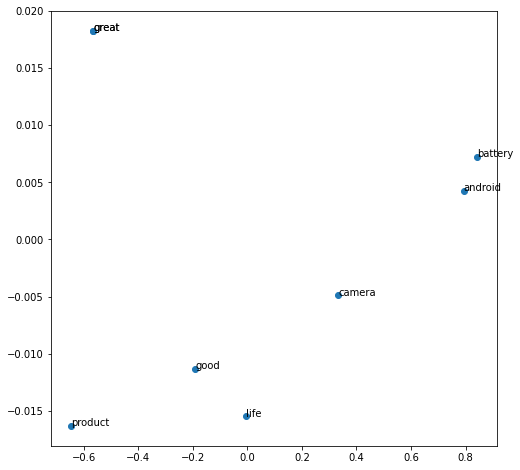

In [42]:
word2vec(flipkart) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


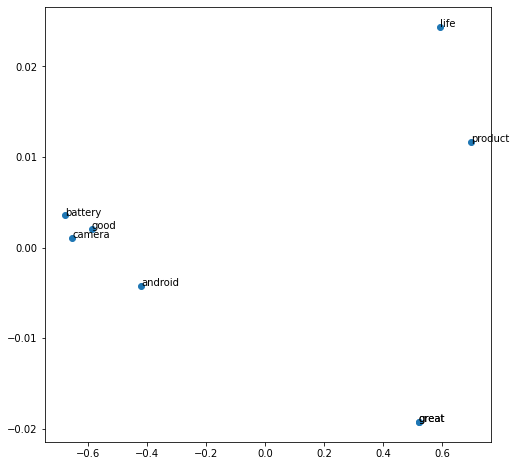

In [43]:
word2vec(amazon) 

###**Classification and Clustering**###

In [44]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import cohen_kappa_score,accuracy_score

In [45]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC 

In [52]:
def model_TFIDF(df):
  X=df.review
  y=df.rating
  x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=123456)
  vectorizer=TfidfVectorizer(stop_words=s,use_idf=True,ngram_range=(1,4))
  vectorizer.fit(x_train)
  x_train=vectorizer.transform(x_train)
  x_val=vectorizer.transform(x_val)
  print(x_train.shape)
  print(x_val.shape) 
  
  def model(model):
    model.fit(X=x_train,y=y_train)
    pred_val=model.predict(x_val)
    acc=accuracy_score(pred_val,y_val)
    cohen=cohen_kappa_score(pred_val,y_val)
    return (acc,cohen) 
  lr=LogisticRegression()
  x=model(lr)
  print(f"Accuracy for Logistic Regression is {x[0]}")
  print(f"Cohen Kappa Score for Logistic Regression is {x[1]}")
  tree=DecisionTreeClassifier()
  x=model(tree)
  print(f"Accuracy for Decision Tree is {x[0]}")
  print(f"Cohen Kappa Score for Decision Tree is {x[1]}")
  sv=SVC()
  x=model(sv) 
  print(f"Accuracy for Support Vector Machine is {x[0]}")
  print(f"Cohen Kappa Score for Support Vector Machine is {x[1]}")

In [53]:
model_TFIDF(flipkart)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(393, 11943)
(169, 11943)
Accuracy for Logistic Regression is 0.8461538461538461
Cohen Kappa Score for Logistic Regression is 0.16479756700247095
Accuracy for Decision Tree is 0.8461538461538461
Cohen Kappa Score for Decision Tree is 0.4463903237999244
Accuracy for Support Vector Machine is 0.8402366863905325
Cohen Kappa Score for Support Vector Machine is 0.11242948842637634


In [62]:
model_TFIDF(amazon)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(380, 18859)
(163, 18859)
Accuracy for Logistic Regression is 0.803680981595092
Cohen Kappa Score for Logistic Regression is -0.030219237606162297
Accuracy for Decision Tree is 0.6993865030674846
Cohen Kappa Score for Decision Tree is 0.19282465891864575
Accuracy for Support Vector Machine is 0.8098159509202454
Cohen Kappa Score for Support Vector Machine is 0.023574879227053036


In [54]:
from sklearn.decomposition import TruncatedSVD

In [55]:
def model_SVD(df):
  X=df.review
  y=df.rating
  x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=123456)
  vectorizer=TfidfVectorizer(stop_words=s,use_idf=True,ngram_range=(1,4))
  vectorizer.fit(x_train)
  x_train=vectorizer.transform(x_train)
  x_val=vectorizer.transform(x_val)
  SV=TruncatedSVD(n_components=200,n_iter=100)
  SV.fit(x_train)
  x_train=SV.fit_transform(x_train)
  x_val=SV.transform(x_val)
  def model(model):
    model.fit(X=x_train,y=y_train)
    pred_val=model.predict(x_val)
    acc=accuracy_score(pred_val,y_val)
    cohen=cohen_kappa_score(pred_val,y_val)
    return (acc,cohen) 
  lr=LogisticRegression()
  x=model(lr)
  print(f"Accuracy for Logistic Regression is {x[0]}")
  print(f"Cohen Kappa Score for Logistic Regression is {x[1]}")
  tree=DecisionTreeClassifier()
  x=model(tree)
  print(f"Accuracy for Decision Tree is {x[0]}")
  print(f"Cohen Kappa Score for Decision Tree is {x[1]}")
  sv=SVC()
  x=model(sv) 
  print(f"Accuracy for Suppoert Vector Machine is {x[0]}")
  print(f"Cohen Kappa Score for Suppoert Vector Machine is {x[1]}")

In [56]:
model_SVD(flipkart)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


Accuracy for Logistic Regression is 0.8461538461538461
Cohen Kappa Score for Logistic Regression is 0.16479756700247095
Accuracy for Decision Tree is 0.834319526627219
Cohen Kappa Score for Decision Tree is 0.17575335307437723
Accuracy for Suppoert Vector Machine is 0.8698224852071006
Cohen Kappa Score for Suppoert Vector Machine is 0.3523776345584393


In [57]:
model_SVD(amazon)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


Accuracy for Logistic Regression is 0.803680981595092
Cohen Kappa Score for Logistic Regression is -0.030219237606162297
Accuracy for Decision Tree is 0.7852760736196319
Cohen Kappa Score for Decision Tree is 0.04262460144319513
Accuracy for Suppoert Vector Machine is 0.8098159509202454
Cohen Kappa Score for Suppoert Vector Machine is 0.023574879227053036


**KMeans**

In [58]:
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [59]:
def clustering(df):
  X=df.review
  y=df.rating
  vectorizer=TfidfVectorizer(stop_words=s,use_idf=True,ngram_range=(1,4))
  X=vectorizer.fit_transform(X)
  SV=TruncatedSVD(n_components=150,n_iter=100)
  X=SV.fit_transform(X)
  print(X.shape)
  print(y.shape) 
  wcss=[]
  for i in range(5,15):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
  number_clusters = range(5,15)
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow title')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(543, 150)
(543,)


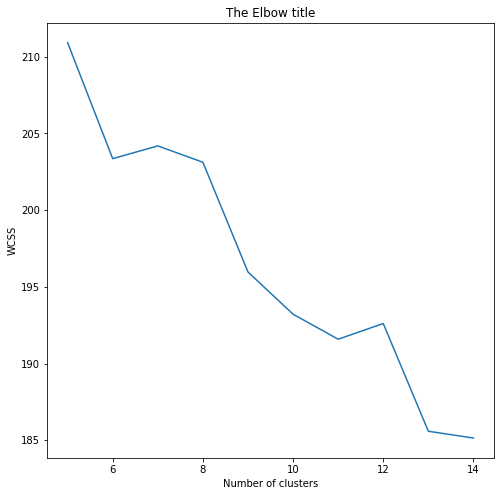

In [60]:
clustering(amazon)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'apple', 'aren', 'couldn', 'didn', 'doesn', 'don', 'flipkart', 'hadn', 'hasn', 'haven', 'iphone', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(562, 150)
(562,)


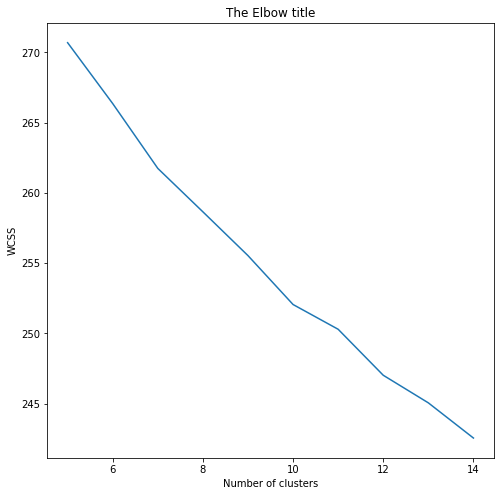

In [61]:
clustering(flipkart)